# Heart Failure Prediction Dataset



Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information

- *Age*: age of the patient [years]
- *Sex*: sex of the patient [M: Male, F: Female]
- *ChestPainType*: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- *RestingBP*: resting blood pressure [mm Hg]
- *Cholesterol*: serum cholesterol [mm/dl]
- *FastingBS*: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- *RestingECG*: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- *MaxHR*: maximum heart rate achieved [Numeric value between 60 and 202]
- *ExerciseAngina*: exercise-induced angina [Y: Yes, N: No]
- *Oldpeak*: oldpeak = ST [Numeric value measured in depression]
- *ST_Slope*: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- *HeartDisease*: output class [1: heart disease, 0: Normal]

In [116]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [117]:
data = pd.read_csv('heart.csv')

## Exploratory data analysis (EDA)

In [118]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [119]:
data.shape

(918, 12)

In [120]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [122]:
string_col = data.select_dtypes("object").columns
data[string_col]=data[string_col].astype("string")

In [123]:
# obtener columnas categoricas

In [124]:
string_col=data.select_dtypes("string").columns.to_list()
num_col=data.columns.to_list()
print(num_col)
for col in string_col:
    num_col.remove(col)
#num_col.remove("HeartDisease")


['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [125]:
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [126]:
px.imshow(data[num_col].corr(),title="Correlation Matrix plot of the Heat Failure Prediction")

"HeartDisease" tiene una alta correlación negativa con "MaxHR" y una correlación algo negativa con "Cholesterol". Tiene una correlación positiva con "Oldpeak", "FastingBS" y "RestingBP"

In [127]:
# Viendo algunas distribuciones según sexo
fig=px.histogram(data, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=data.columns,
                 title="Distribution of Heart Diseases")
fig.show()

In [128]:
fig=px.histogram(data,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=data.columns,
                 title="Types of Chest Pain",
                )
fig.show()

In [129]:
fig=px.histogram(data,
                 x="Sex",
                 color="Sex",
                 hover_data=data.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [130]:

fig=px.histogram(data,
                 x="RestingECG",
                 color='Sex',
                 hover_data=data.columns,
                 title="Distribution of Resting ECG")
fig.show()


[]

<Figure size 1500x1000 with 0 Axes>

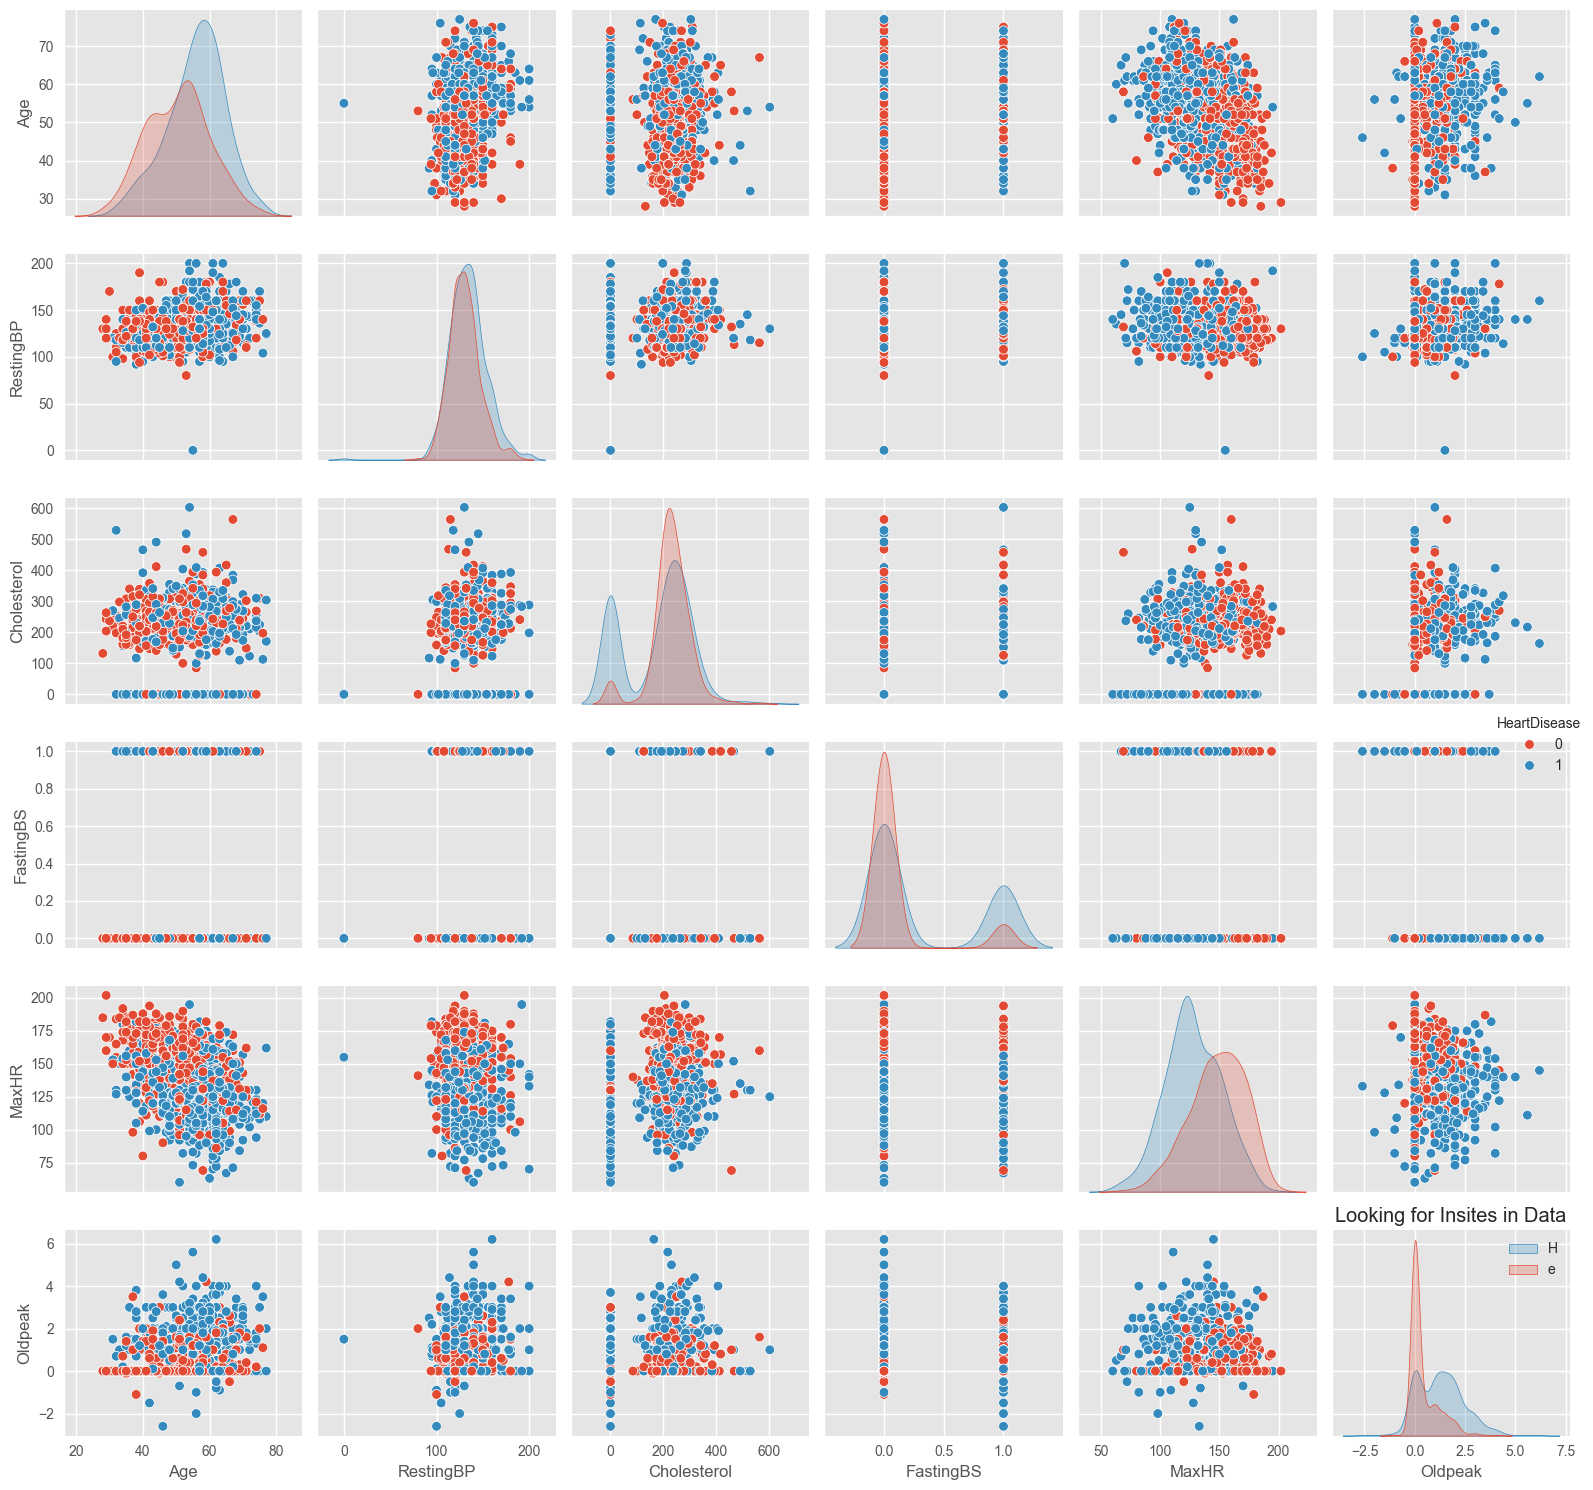

In [131]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

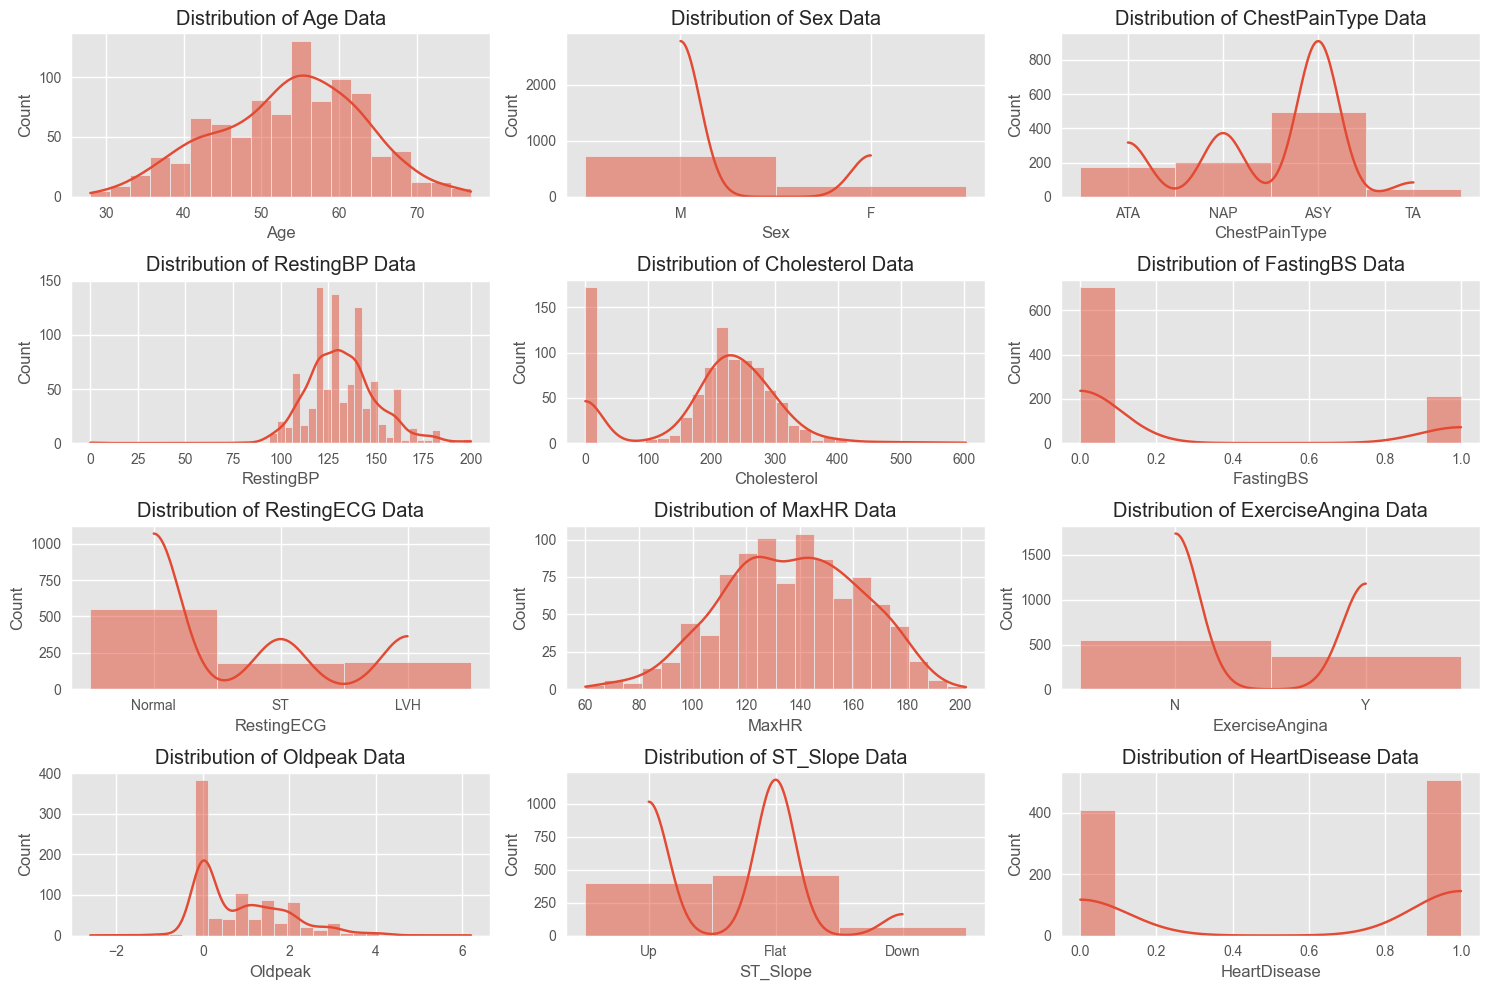

In [132]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

Cholesterol = 0 y OldPeak < 0 no tienen sentido

# Outliers analysis

In [133]:
fig = px.box(data,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [134]:
fig = px.box(data,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [135]:
fig = px.box(data,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [136]:
fig = px.box(data,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [137]:
fig = px.box(data,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

In [138]:
def outlier_function(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count += 1
    return lower_limit, upper_limit, outlier_count

In [139]:
for col in data[num_col].columns:
    out=outlier_function(data[num_col],col)
    if out[2]>0:
        print(f"There are {out[2]} outliers in {col}")

There are 1 outliers in RestingBP
There are 2 outliers in Cholesterol
There are 214 outliers in FastingBS
There are 1 outliers in Oldpeak


In [140]:
len(data[data['Cholesterol']==0])

172

In [141]:
len(data[data['Oldpeak']<0])

13

In [142]:
data.drop(data.index[data['Oldpeak']<0], inplace=True)
data.reset_index(inplace=True, drop=True)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             905 non-null    int64  
 1   Sex             905 non-null    string 
 2   ChestPainType   905 non-null    string 
 3   RestingBP       905 non-null    int64  
 4   Cholesterol     905 non-null    int64  
 5   FastingBS       905 non-null    int64  
 6   RestingECG      905 non-null    string 
 7   MaxHR           905 non-null    int64  
 8   ExerciseAngina  905 non-null    string 
 9   Oldpeak         905 non-null    float64
 10  ST_Slope        905 non-null    string 
 11  HeartDisease    905 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 85.0 KB


In [144]:
def assign_age_range(age):
    if age < 30:
        return '0-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60+'

In [145]:
range_age = data['Age'].apply(assign_age_range)

In [146]:

df_grouped = data.groupby(['Sex', range_age])
df_fixed = data.copy()

# Reemplazar los ceros con la mediana del grupo correspondiente
for name, group in df_grouped:
    median_cholesterol = group.loc[group['Cholesterol'] > 0, 'Cholesterol'].median()
    mask = (df_fixed['Sex'] == name[0]) & (range_age == name[1]) & (df_fixed['Cholesterol'] == 0)
    print(median_cholesterol)
    df_fixed.loc[mask, 'Cholesterol'] = median_cholesterol



210.0
234.5
269.5
269.0
223.5
240.5
238.0
229.0
244.0


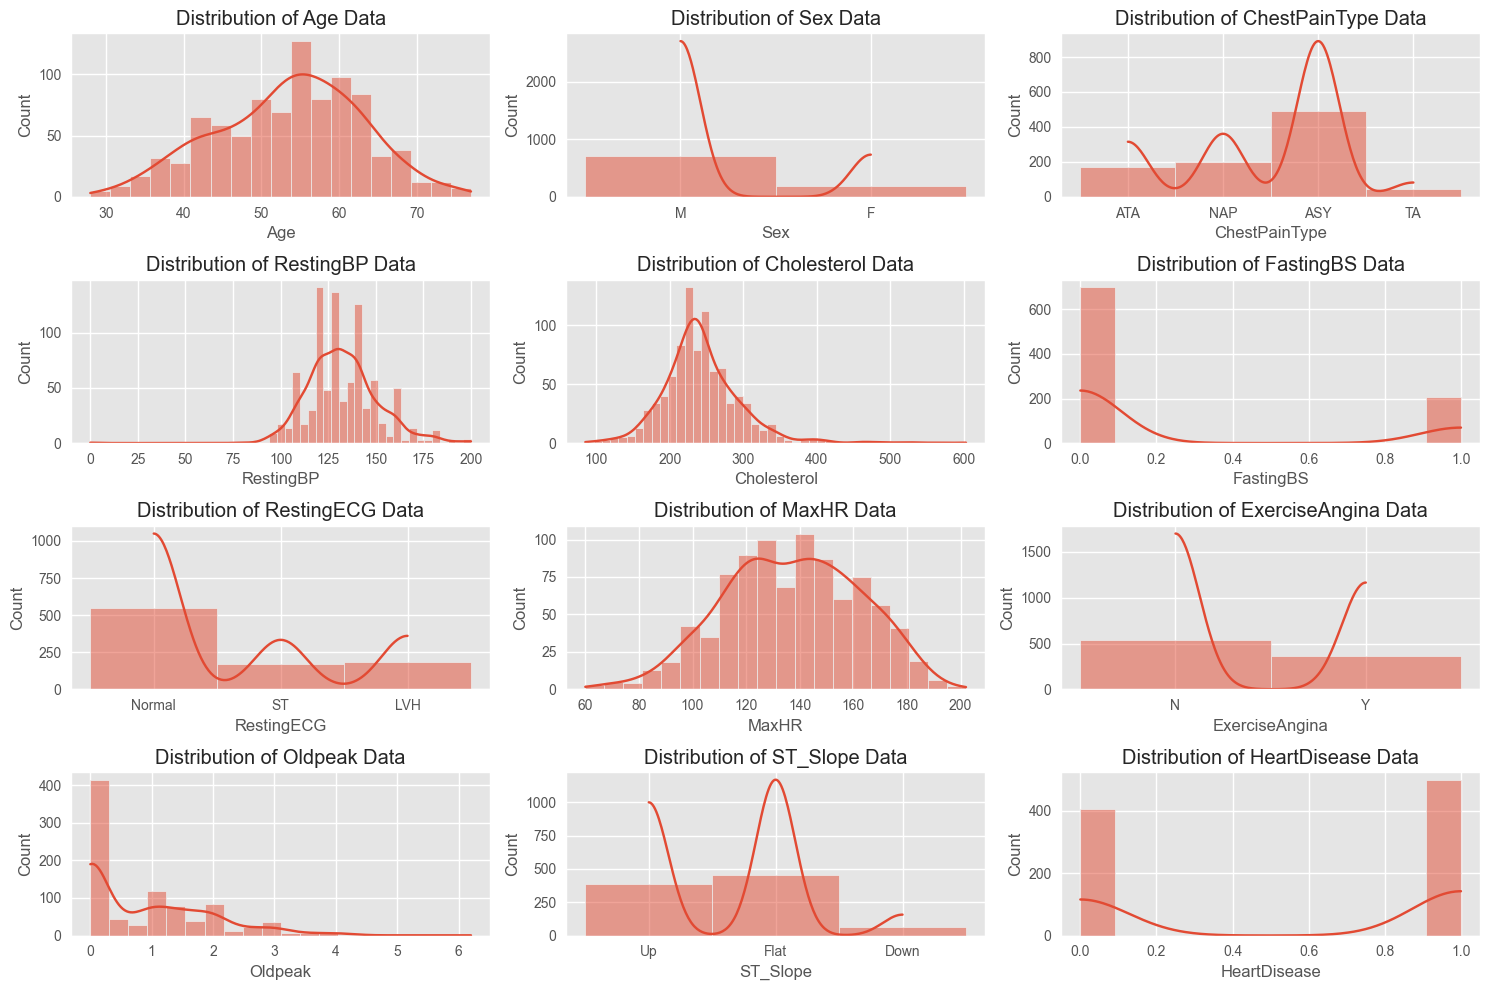

In [147]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df_fixed.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_fixed[col],kde=True)
    plt.tight_layout()
    plt.plot()

[]

<Figure size 1500x1000 with 0 Axes>

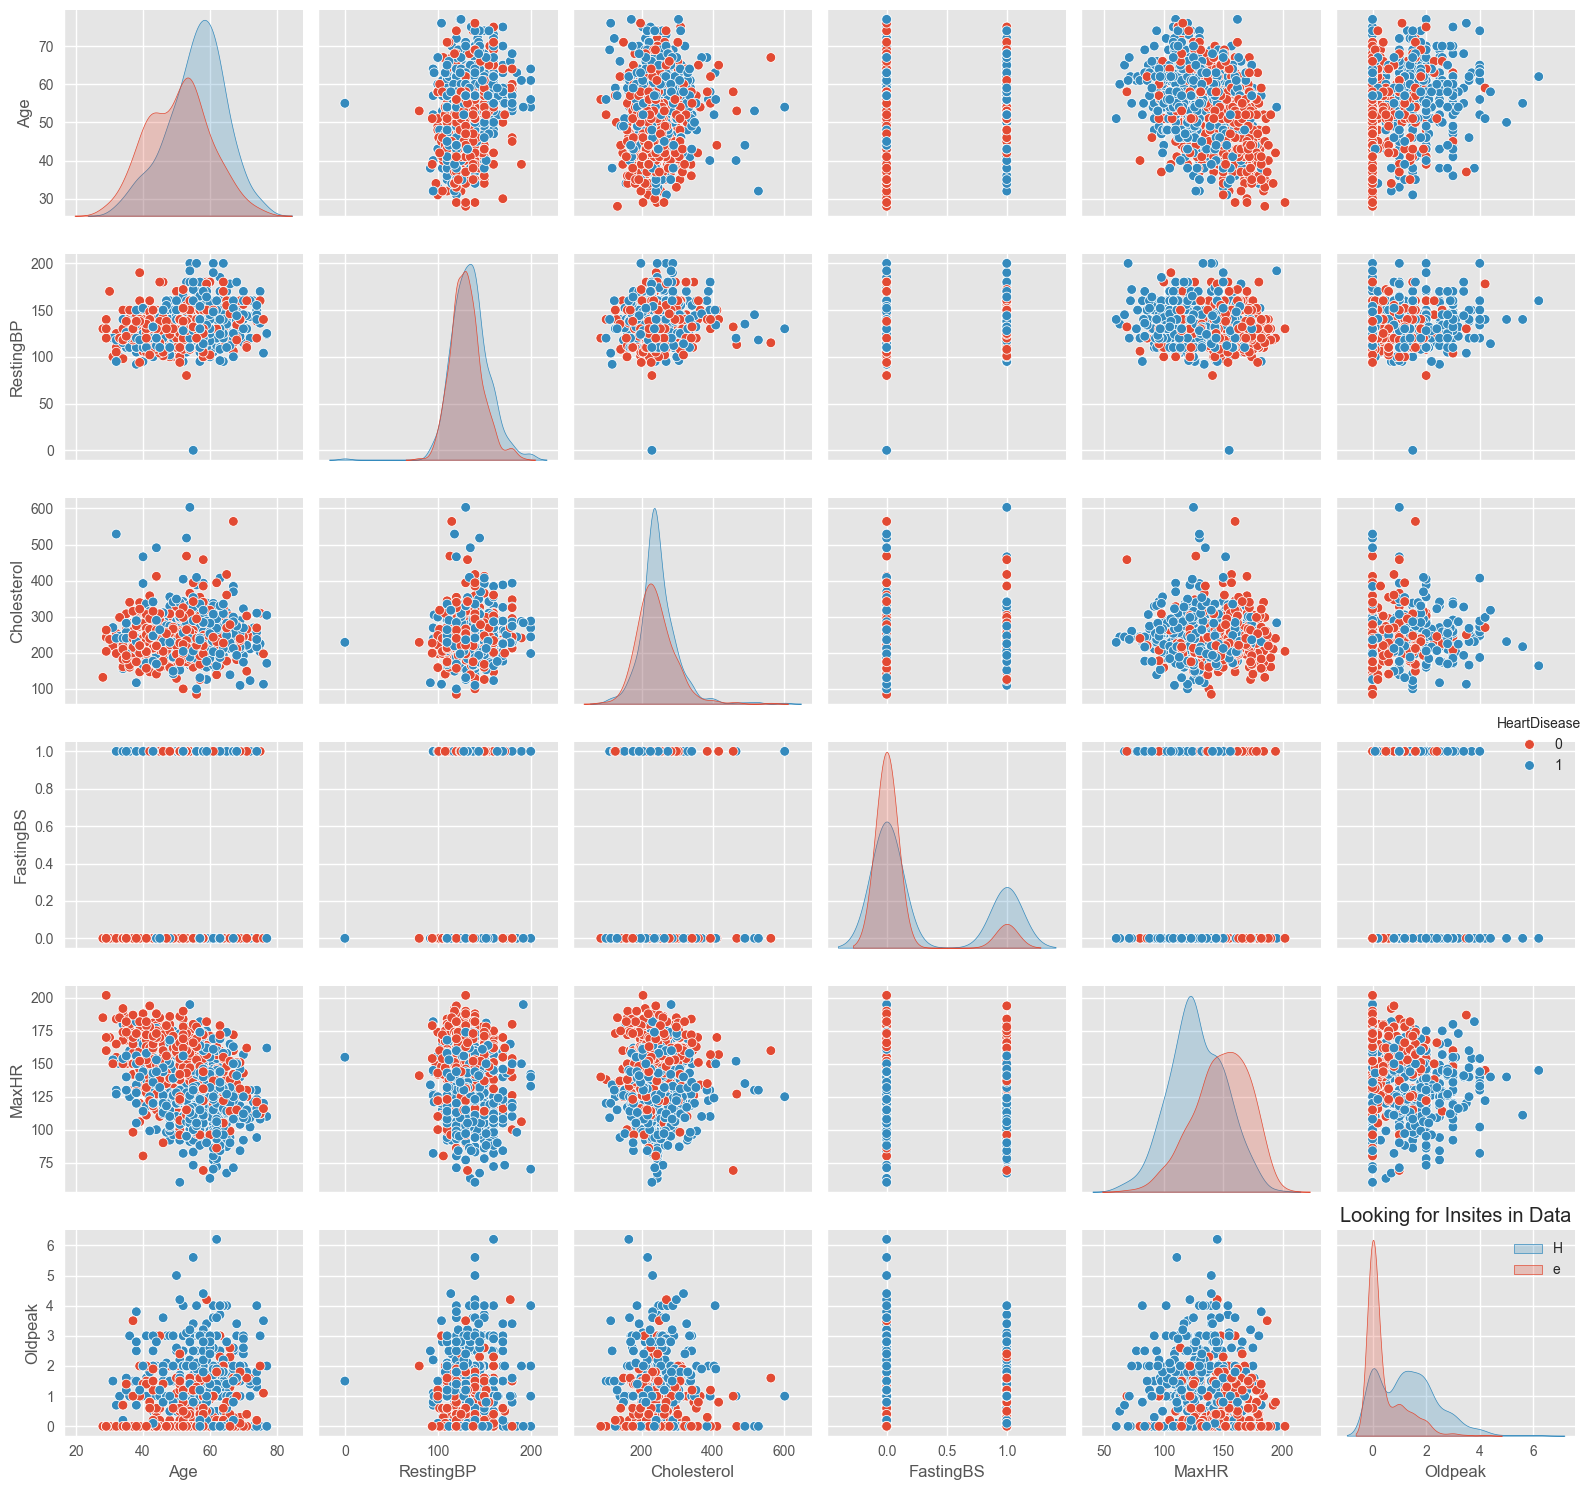

In [148]:
plt.figure(figsize=(15,10))
sns.pairplot(df_fixed,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [149]:

px.imshow(df_fixed[num_col].corr(),title="Correlation Matrix plot of the Heat Failure Prediction")

In [150]:
data = df_fixed

# Preprocessing

In [151]:
### Tree Based Algorithms -> Using  Label Encoding
df_tree = data[string_col].apply(LabelEncoder().fit_transform)
df_tree = pd.concat([data.drop(string_col, axis=1), df_tree], axis=1)
df_tree.tail()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
900,45,110,264.0,0,132,1.2,1,1,3,1,0,1
901,68,144,193.0,1,141,3.4,1,1,0,1,0,1
902,57,130,131.0,0,115,1.2,1,1,0,1,1,1
903,57,130,236.0,0,174,0.0,1,0,1,0,0,1
904,38,138,175.0,0,173,0.0,0,1,2,1,0,2


In [152]:
# Pongo la columna target al final
target="HeartDisease"
y=df_tree[target].values
df_tree.drop("HeartDisease",axis=1,inplace=True)
df_tree=pd.concat([df_tree,data[target]],axis=1)
df_tree.tail()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
900,45,110,264.0,0,132,1.2,1,3,1,0,1,1
901,68,144,193.0,1,141,3.4,1,0,1,0,1,1
902,57,130,131.0,0,115,1.2,1,0,1,1,1,1
903,57,130,236.0,0,174,0.0,0,1,0,0,1,1
904,38,138,175.0,0,173,0.0,1,2,1,0,2,0


In [153]:
## Creating one hot encoded features for working with non tree based algorithms 
enc = OneHotEncoder(sparse_output=False)
enc_nontree = enc.fit_transform(data[string_col])
df_nontree = pd.DataFrame(
    enc_nontree,
    columns=enc.get_feature_names_out(string_col)
)
df_nontree = pd.concat([data.drop(string_col, axis=1), df_nontree], axis=1)



In [154]:
# Pongo la columna target al final
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,data[target]],axis=1)
df_nontree.tail()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
900,45,110,264.0,0,132,1.2,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
901,68,144,193.0,1,141,3.4,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
902,57,130,131.0,0,115,1.2,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
903,57,130,236.0,0,174,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
904,38,138,175.0,0,173,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [155]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

### Stratified cross-validation

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV

X_train_full, X_test, y_train_full, y_test = train_test_split(df_nontree[feature_col_nontree], y, test_size=0.2, random_state=42, stratify=y) 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_train

array([[0.6875    , 0.62962963, 0.16492693, ..., 1.        , 0.        ,
        0.        ],
       [0.39583333, 0.53703704, 0.29645094, ..., 0.        , 1.        ,
        0.        ],
       [0.4375    , 0.44444444, 0.27348643, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.22916667, 0.02777778, 0.31941545, ..., 0.        , 0.        ,
        1.        ],
       [0.60416667, 0.30555556, 0.44885177, ..., 0.        , 0.        ,
        1.        ],
       [0.70833333, 0.39814815, 0.34864301, ..., 0.        , 0.        ,
        1.        ]])

## NO-TREE BASED ALGORITHMS

In [157]:
models = {
            "scv": SVC(),
            "logistic": LogisticRegression(),
            "gaussian_nb": GaussianNB()
        }

param_grids = {
    "scv": {
        "C": [0.1, 1.0, 10.0],
        "kernel" : ["linear", "sigmoid", "rbf", "poly"]
    },
    "logistic": {
        "C": [0.1, 1.0, 10.0],
        "solver": ["liblinear", "saga"]
    },
    "gaussian_nb": {
        'var_smoothing': np.logspace(-11, -5, 7)
    },
}

In [158]:
from sklearn import model_selection
results=[]
for name, base_model in models.items():
    print(f"Entrenando modelo con GridSearch: {name}")
    grid_key = name.lower()

    grid_search = GridSearchCV(
                base_model, 
                param_grids[grid_key], 
                cv=5, 
                scoring='roc_auc',
                )
    
    grid_search.fit(X_train, y_train)
    
    models[name] = grid_search.best_estimator_
        
    y_pred = grid_search.predict(X_valid)
        
    # Metrics
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid,y_pred)
        
    results.append({
                "Modelo": name,
                "Best Params": str(grid_search.best_params_),
                "CV Accuracy": f"{grid_search.best_score_:.5f}",
                "Validation Accuracy": f"{accuracy:.5f}",
                "Precision": f"{precision:.4f}",
                "Recall": f"{recall:.4f}",
                "F1 Score": f"{f1:.4f}",
                "ROC-AUC": f"{roc_auc:.4f}"
            })

    print(f"Modelo {name}: Best params={grid_search.best_params_}, Accuracy={accuracy:.4f}, F1={f1:.4f}, AUC={roc_auc:.4f}")



Entrenando modelo con GridSearch: scv
Modelo scv: Best params={'C': 10.0, 'kernel': 'linear'}, Accuracy=0.8785, F1=0.8922, AUC=0.8748
Entrenando modelo con GridSearch: logistic
Modelo logistic: Best params={'C': 1.0, 'solver': 'saga'}, Accuracy=0.8619, F1=0.8744, AUC=0.8609
Entrenando modelo con GridSearch: gaussian_nb
Modelo gaussian_nb: Best params={'var_smoothing': 1e-05}, Accuracy=0.8729, F1=0.8808, AUC=0.8756


## TREE BASED ALGORITHM


In [159]:
df_tree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40,140,289.0,0,172,0.0,1,1,1,0,2,0
1,49,160,180.0,0,156,1.0,0,2,1,0,1,1
2,37,130,283.0,0,98,0.0,1,1,2,0,2,0
3,48,138,214.0,0,108,1.5,0,0,1,1,1,1
4,54,150,195.0,0,122,0.0,1,2,1,0,2,0


In [160]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [161]:
X_train_full, X_test, y_train_full, y_test = train_test_split(df_tree[feature_col_tree], y, test_size=0.2, random_state=42, stratify=y) 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

models = {
            "decisiontree": DecisionTreeClassifier(),
            "randomforest": RandomForestClassifier(),
            "XGBC": XGBClassifier(),
            "catboost" : CatBoostClassifier(verbose=False)
        }

param_grids = {

    "decisiontree": {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2', None]
        },
    "randomforest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'criterion': ['gini', 'entropy']
        },
    "xgbc": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        },
    "catboost":{
        'iterations': [200, 500, 1000],
        'learning_rate': [0.01, 0.1],
        'depth': [4, 6, 8],
        'loss_function': ['Logloss']
}
}

In [186]:
for name, base_model in models.items():
    print(f"Entrenando modelo con GridSearch: {name}")
    grid_key = name.lower()

    grid_search = GridSearchCV(
                base_model, 
                param_grids[grid_key], 
                cv=5, 
                scoring='roc_auc',
                n_jobs=-1  # Usar todos los núcleos disponibles
                )
    
    grid_search.fit(X_train, y_train)
    
    models[name] = grid_search.best_estimator_
        
    y_pred = grid_search.predict(X_valid)
        
    # Metrics
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid,y_pred)
        
    results.append({
                "Modelo": name,
                "Best Params": str(grid_search.best_params_),
                "CV Accuracy": f"{grid_search.best_score_:.4f}",
                "Validation Accuracy": f"{accuracy:.4f}",
                "Precision": f"{precision:.4f}",
                "Recall": f"{recall:.4f}",
                "F1 Score": f"{f1:.4f}",
                "ROC-AUC": f"{roc_auc:.4f}"
            })

    print(f"Modelo {name}: Best params={grid_search.best_params_}, Accuracy={accuracy:.4f}, F1={f1:.4f}, AUC={roc_auc:.4f}")



Entrenando modelo con GridSearch: decisiontree
Modelo decisiontree: Best params={'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}, Accuracy=0.8232, F1=0.8384, AUC=0.8224
Entrenando modelo con GridSearch: randomforest
Modelo randomforest: Best params={'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}, Accuracy=0.8950, F1=0.9064, AUC=0.8921
Entrenando modelo con GridSearch: XGBC
Modelo XGBC: Best params={'learning_rate': 0.1, 'n_estimators': 100}, Accuracy=0.8785, F1=0.8866, AUC=0.8806
Entrenando modelo con GridSearch: catboost
Modelo catboost: Best params={'depth': 6, 'iterations': 500, 'learning_rate': 0.01, 'loss_function': 'Logloss'}, Accuracy=0.8785, F1=0.8900, AUC=0.8771


In [164]:
results

[{'Modelo': 'scv',
  'Best Params': "{'C': 10.0, 'kernel': 'linear'}",
  'CV Accuracy': '0.91449',
  'Validation Accuracy': '0.87845',
  'Precision': '0.8750',
  'Recall': '0.9100',
  'F1 Score': '0.8922',
  'ROC-AUC': '0.8748'},
 {'Modelo': 'logistic',
  'Best Params': "{'C': 1.0, 'solver': 'saga'}",
  'CV Accuracy': '0.91548',
  'Validation Accuracy': '0.86188',
  'Precision': '0.8788',
  'Recall': '0.8700',
  'F1 Score': '0.8744',
  'ROC-AUC': '0.8609'},
 {'Modelo': 'gaussian_nb',
  'Best Params': "{'var_smoothing': 1e-05}",
  'CV Accuracy': '0.88975',
  'Validation Accuracy': '0.87293',
  'Precision': '0.9140',
  'Recall': '0.8500',
  'F1 Score': '0.8808',
  'ROC-AUC': '0.8756'},
 {'Modelo': 'decisiontree',
  'Best Params': "{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}",
  'CV Accuracy': '0.8852',
  'Validation Accuracy': '0.8343',
  'Precision': '0.8571',
  'Recall': '0.8400',
  'F1 Score': '0.8485',
  'ROC-AUC': '

In [ ]:
results_df = pd.DataFrame(results)
results_df.to_csv("model_evaluation.csv", index=False)

## Using pycaret

In [165]:

from pycaret.classification import *
num_features=[e for e in num_col if e not in ['HeartDisease']]

Heartdisease= setup(data=data,
          target = 'HeartDisease',  session_id=42,
          normalize=True,
          train_size = 0.8, # training over 80% of available data
          remove_multicollinearity = True, #drop one of the two features that are highly correlated with each other
          fix_imbalance = True,
          transformation = True,normalize_method='robust',
                    categorical_features=string_col,
                    numeric_features=num_features
         )

,Description,Value
0,Session id,42
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(905, 12)"
4,Transformed data shape,"(979, 19)"
5,Transformed train set shape,"(798, 19)"
6,Transformed test set shape,"(181, 19)"
7,Numeric features,6
8,Categorical features,5
9,Preprocess,True


In [166]:
model_catboost_AUC = tune_model(create_model('catboost'),optimize = 'AUC')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:53:06
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8356,0.8977,0.9000,0.8182,0.8571,0.6646,0.6688
1,0.9041,0.9545,0.9000,0.9231,0.9114,0.8070,0.8073
2,0.8630,0.9159,0.8500,0.8947,0.8718,0.7249,0.7260
3,0.8082,0.9083,0.8250,0.8250,0.8250,0.6129,0.6129
4,0.8611,0.9133,0.8750,0.8750,0.8750,0.7188,0.7188
5,0.8611,0.9500,0.9000,0.8571,0.8780,0.7170,0.7181
6,0.8333,0.9172,0.9000,0.8182,0.8571,0.6582,0.6625
7,0.8472,0.9312,0.8500,0.8718,0.8608,0.6916,0.6919
8,0.8889,0.9297,0.8750,0.9211,0.8974,0.7764,0.7776


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8356,0.9068,0.9000,0.8182,0.8571,0.6646,0.6688
1,0.8630,0.9477,0.8500,0.8947,0.8718,0.7249,0.7260
2,0.8630,0.8970,0.8500,0.8947,0.8718,0.7249,0.7260
3,0.8082,0.9152,0.8250,0.8250,0.8250,0.6129,0.6129
4,0.8333,0.9141,0.8250,0.8684,0.8462,0.6646,0.6656
5,0.8611,0.9469,0.9000,0.8571,0.8780,0.7170,0.7181
6,0.8333,0.9211,0.8750,0.8333,0.8537,0.6604,0.6614
7,0.8472,0.9219,0.8500,0.8718,0.8608,0.6916,0.6919
8,0.8750,0.9375,0.8500,0.9189,0.8831,0.7492,0.7519


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [167]:
plot_model(model_catboost_AUC,plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
random_score_type,NormalWithModelSizeDecrease
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant


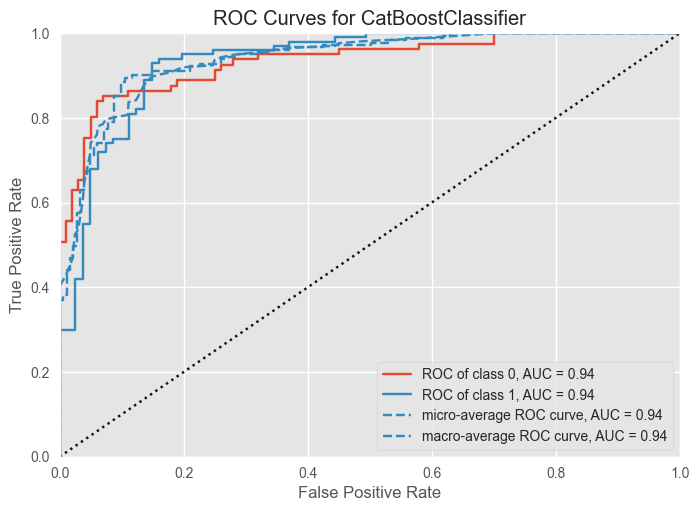

In [168]:
plot_model(model_catboost_AUC,plot = 'auc')

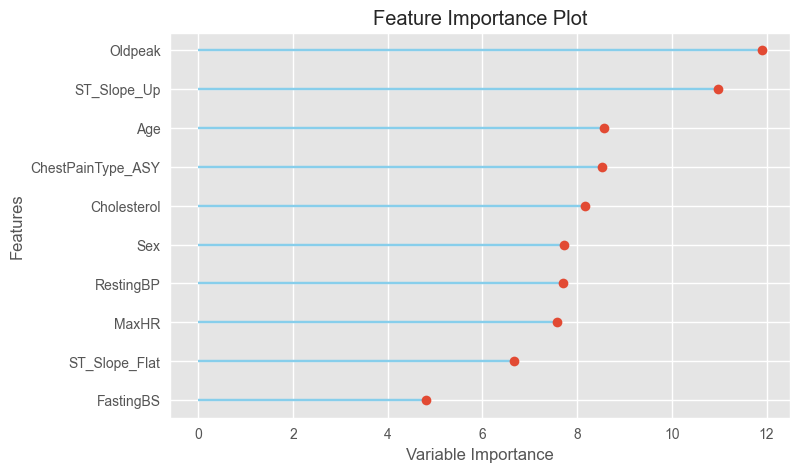

In [169]:
plot_model(model_catboost_AUC,plot = 'feature')

In [170]:
predict_model(model_catboost_AUC)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8950,0.9351,0.9400,0.8785,0.9082,0.7860,0.7884


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,prediction_label,prediction_score
75,46,M,NAP,150,163.0,0,Normal,116,N,0.0,Up,0,0,0.9861
480,49,M,TA,130,238.0,0,ST,145,N,3.0,Flat,1,1,0.7858
842,68,M,NAP,180,274.0,1,LVH,150,Y,1.6,Flat,1,1,0.5106
336,51,M,ASY,120,229.0,1,Normal,104,N,0.0,Flat,1,1,0.9899
879,39,F,NAP,138,220.0,0,Normal,152,N,0.0,Flat,0,0,0.8195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,38,M,ASY,150,240.5,1,Normal,120,Y,0.7,Flat,1,1,0.9860
132,56,M,ASY,170,388.0,0,ST,122,Y,2.0,Flat,1,1,0.9610
439,64,M,ASY,144,244.0,0,ST,122,Y,1.0,Flat,1,1,0.9479
507,64,M,ASY,130,223.0,0,ST,128,N,0.5,Flat,0,1,0.7422
